In [1]:
import numpy as np
import pandas as pd
from my_package import data_processing

In [2]:
# load data by pandas
path = '0926WT_analysis.xlsx'
data = pd.ExcelFile(path)
sheetname = data.sheet_names
print(sheetname)

['Events', 'Steps', 'Segments', 'Tracks']


In [3]:
# extract data from the excel file
data_events = data.parse(sheetname[0])
data_events = pd.DataFrame(data_events) # convert to dataframe
data_steps = data.parse(sheetname[1])
data_steps = pd.DataFrame(data_steps)
data_seg = data.parse(sheetname[2])
data_seg = pd.DataFrame(data_seg)

# show data
data_seg.head(5)
print(data_seg.shape[0])
data_events.head(5)
data_steps.head(5)

260


,Step ID,Time Step,Physical Time,Displacement X,Displacement Y,Displacement Z,Step Length,Velocity X,Velocity Y,Velocity Z,...,Orientation Theta,Orientation Phi,Orientation Theta Diff,Orientation Phi Diff,Total Distance,Euclidian Distance,Tortuosity,X Coord,Y Coord,Z Coord
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,178.299,91.9826,7.21621
1,1,1,1,0.202332,-0.237511,0.087260,0.323981,0.202332,-0.237511,0.087260,...,74.3752,-49.57290,8.75516,-138.1910,0.323981,0.323981,1.00000,178.501,91.7451,7.30347
2,2,2,2,-1.606610,0.219040,0.195350,1.633200,-1.606610,0.219040,0.195350,...,83.1303,172.23600,37.40460,-173.3320,1.957180,1.432560,1.36622,176.895,91.9641,7.49882
3,3,3,3,1.286790,-0.024605,-0.759171,1.494250,1.286790,-0.024605,-0.759171,...,120.5350,-1.09542,-53.19720,174.9660,3.451430,0.492717,7.00489,178.181,91.9395,6.73965
4,4,4,4,-1.173650,0.126045,0.492859,1.279160,-1.173650,0.126045,0.492859,...,67.3376,173.87000,77.54080,-53.7738,4.730580,1.293900,3.65606,177.008,92.0656,7.23251


In [4]:
x = 1
for i in range(data_seg.shape[0]):
    print(x)
    x += 1
    
for i in range(data_seg.shape[0]):
    print(i)
    
print(data_seg.shape[0])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [21]:
# combine segment data and steps
combined_data = data_processing.combine_seg_step(data_seg, data_steps)
combined_data.head(5)

,Step ID,Time Step,Physical Time,Displacement X,Displacement Y,Displacement Z,Step Length,Velocity X,Velocity Y,Velocity Z,...,Orientation Phi,Orientation Theta Diff,Orientation Phi Diff,Total Distance,Euclidian Distance,Tortuosity,X Coord,Y Coord,Z Coord,object ID
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.0000,0.000000,0.000000,0.00000,178.299,91.9826,7.21621,1
1,1,1,1,0.202332,-0.237511,0.087260,0.323981,0.202332,-0.237511,0.087260,...,-49.57290,8.75516,-138.1910,0.323981,0.323981,1.00000,178.501,91.7451,7.30347,1
2,2,2,2,-1.606610,0.219040,0.195350,1.633200,-1.606610,0.219040,0.195350,...,172.23600,37.40460,-173.3320,1.957180,1.432560,1.36622,176.895,91.9641,7.49882,1
3,3,3,3,1.286790,-0.024605,-0.759171,1.494250,1.286790,-0.024605,-0.759171,...,-1.09542,-53.19720,174.9660,3.451430,0.492717,7.00489,178.181,91.9395,6.73965,1
4,4,4,4,-1.173650,0.126045,0.492859,1.279160,-1.173650,0.126045,0.492859,...,173.87000,77.54080,-53.7738,4.730580,1.293900,3.65606,177.008,92.0656,7.23251,1


In [24]:
combined_data.dtypes

Step ID                     int64
Time Step                   int64
Physical Time               int64
Displacement X            float64
Displacement Y            float64
Displacement Z            float64
Step Length               float64
Velocity X                float64
Velocity Y                float64
Velocity Z                float64
Speed                     float64
Acceleration X            float64
Acceleration Y            float64
Acceleration Z            float64
Acceleration              float64
Orientation Theta         float64
Orientation Phi           float64
Orientation Theta Diff    float64
Orientation Phi Diff      float64
Total Distance            float64
Euclidian Distance        float64
Tortuosity                float64
X Coord                   float64
Y Coord                   float64
Z Coord                   float64
object ID                   int64
dtype: object

In [20]:
# print(combined_data.shape)
combined_data.describe()

,Step ID,Time Step,Physical Time,Displacement X,Displacement Y,Displacement Z,Step Length,Velocity X,Velocity Y,Velocity Z,...,Orientation Phi,Orientation Theta Diff,Orientation Phi Diff,Total Distance,Euclidian Distance,Tortuosity,X Coord,Y Coord,Z Coord,object ID
count,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,...,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000
mean,3125.000000,96.910414,96.910414,-0.154533,0.213883,-0.106385,1.681922,-0.154533,0.213883,-0.106385,...,8.413143,0.098814,-0.672194,50.744100,18.501560,7.867680,175.013485,118.452761,25.915543,90.808191
std,1804.652598,55.799429,55.799429,1.391016,1.561402,1.093304,1.679244,1.391016,1.561402,1.093304,...,104.839651,48.901258,77.622560,51.618314,20.196025,20.703854,67.646988,78.085498,17.054877,77.780780
min,0.000000,0.000000,0.000000,-13.221100,-18.160800,-13.921300,0.000000,-13.221100,-18.160800,-13.921300,...,-179.905000,-159.364000,-179.859000,0.000000,0.000000,0.000000,17.987500,0.875000,1.428570,1.000000
25%,1562.500000,48.500000,48.500000,-0.624192,-0.389194,-0.477395,0.684276,-0.624192,-0.389194,-0.477395,...,-90.010300,-24.424250,-29.992500,10.272150,2.873425,1.304850,123.723500,50.312500,9.370015,12.000000
50%,3125.000000,97.000000,97.000000,-0.038147,0.103310,-0.047530,1.278820,-0.038147,0.103310,-0.047530,...,22.480800,0.000000,0.000000,33.415100,11.326200,2.005970,178.022000,109.118000,22.354100,80.000000
75%,4687.500000,145.000000,145.000000,0.411660,0.861527,0.286909,2.121740,0.411660,0.861527,0.286909,...,95.189050,23.351150,28.470550,76.500600,27.569700,3.859705,226.456500,165.464000,42.915850,164.000000
max,6250.000000,194.000000,194.000000,9.560210,15.526700,11.527300,19.583200,9.560210,15.526700,11.527300,...,179.990000,167.043000,179.930000,278.174000,111.773000,357.164000,304.467000,330.886000,55.259400,260.000000


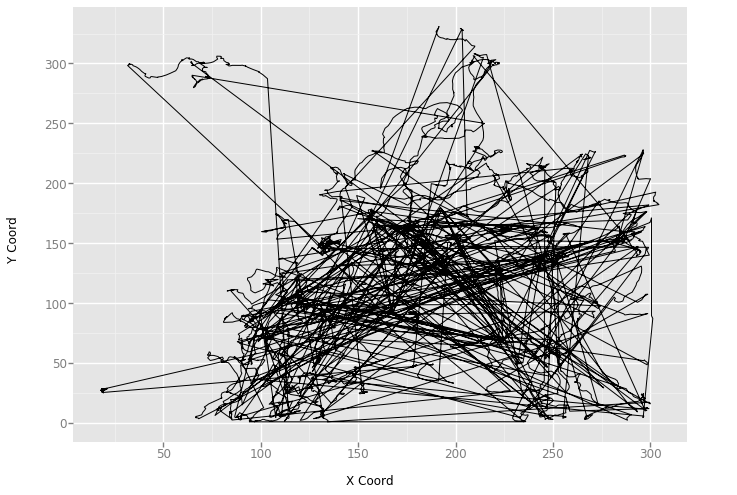

In [32]:
from ggplot import *
P1 = ggplot(combined_data, aes(x= 'X Coord', y = 'Y Coord')) + \
    geom_path(aes(group = 'object ID'))
P1.show()

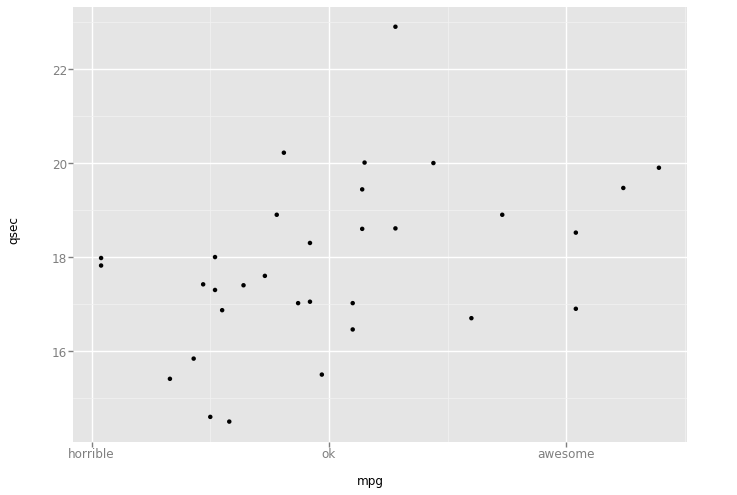

In [34]:
from ggplot import *

P1 = ggplot(mtcars, aes('mpg', 'qsec')) + \
  geom_point(colour='red') + \
  scale_x_continuous(breaks=[10,20,30],  \
                     labels=["horrible", "ok", "awesome"])
P1.show()

In [30]:
mtcars.dtypes

name     object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object